In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [10]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_wine, load_diabetes

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [78]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

import statsmodels.api as sm

from sklearn.tree import export_graphviz
import graphviz 

# 1. Decision Tree

+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘
+ 과적합 문제
+ 전처리가 거의 필요없다.(표준화, 정규화, Scaling)
+ 균일도 측정 방식
    - entropy를 이용한 Information Gain 지수(ID3알고리즘)
    - gini 계수 : 0(평등) -> 1(불평등)


+ Graphviz
    - http://www.graphviz.org 에서 프로그램 다운로드 및 설치
        - jupyter notebook 재실행
        
    - pip install graphviz

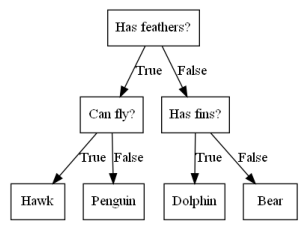

In [4]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz\bin"

mglearn.plots.plot_animal_tree()

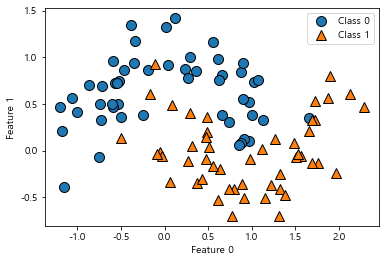

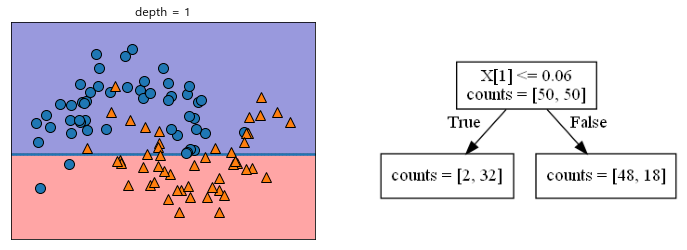

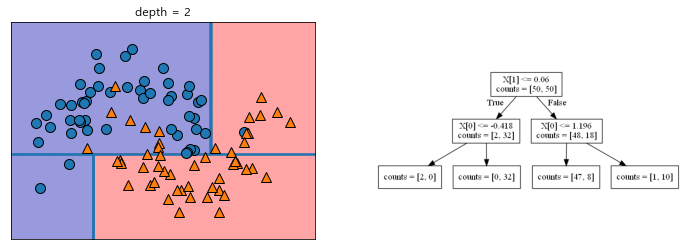

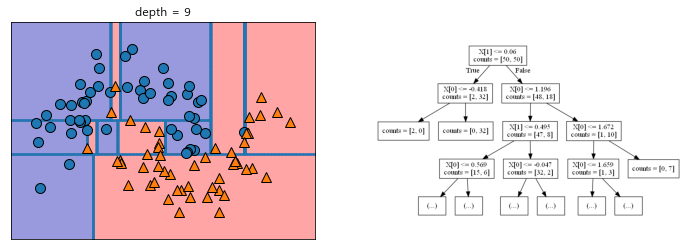

In [5]:
mglearn.plots.plot_tree_progressive()

### (1) 간단한 예

In [10]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                   random_state=11)

dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

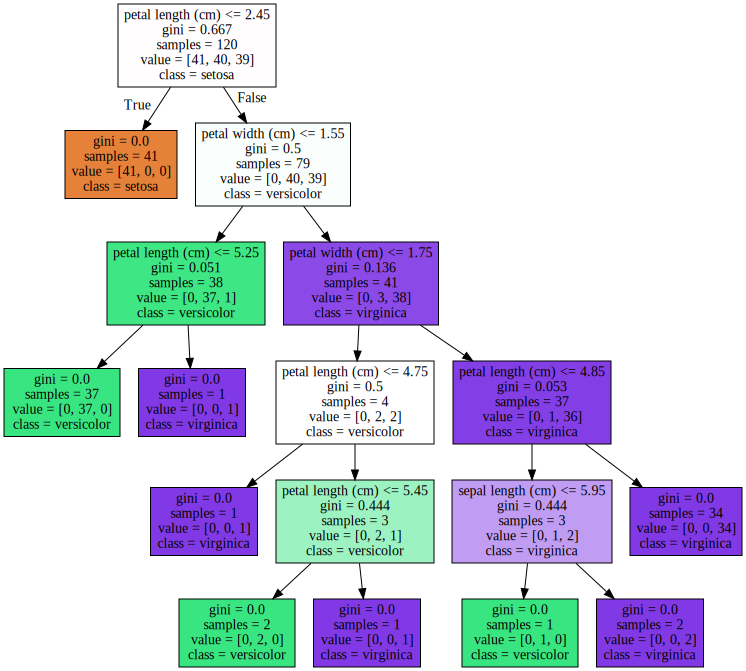

In [20]:
import graphviz 

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

In [14]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8666666666666667


### (2) 과적합 해소를 위한 복잡도 제어 : Prunning(가지치기)

+ 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원
    

+ 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - max_depth
    - max_leaf_nodes

In [15]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                   random_state=11)

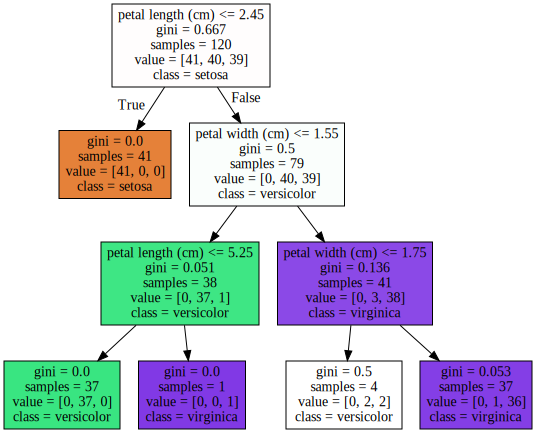

In [17]:
##### max_depth
dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

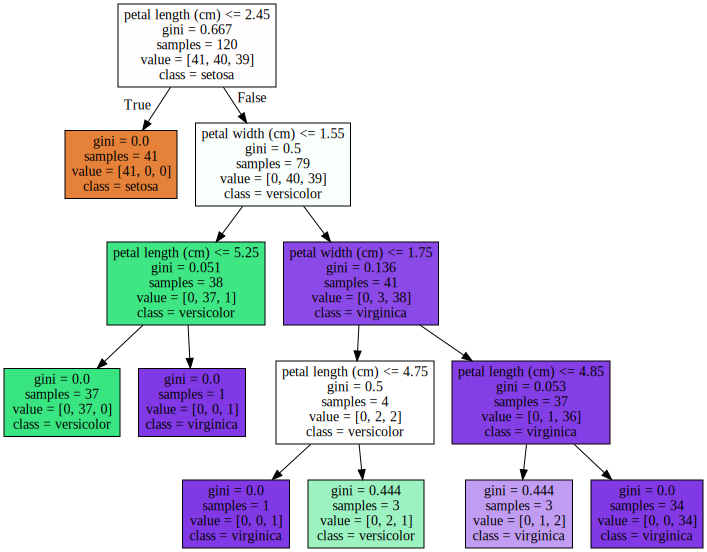

In [18]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

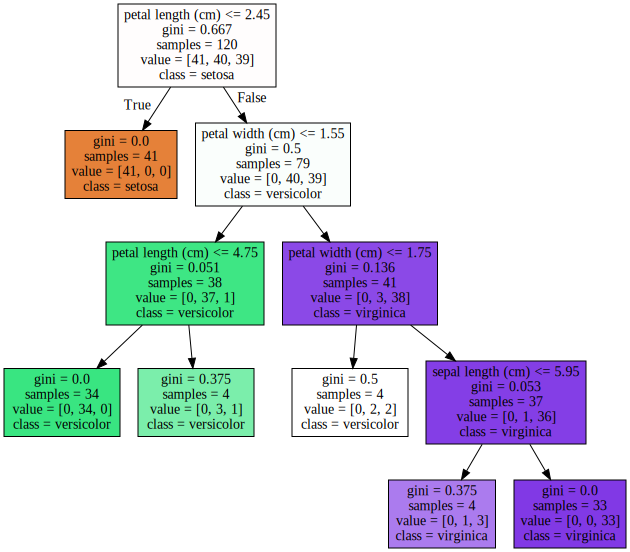

In [19]:
##### min_samples_leaf : 리프노드가 되기위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

### (3) 성능 개선

#### 1) 특성 중요도

##### iris sample

In [47]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                    random_state=11)

dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

In [48]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


In [37]:
dir(dt_clf)
print(dt_clf.feature_importances_)
print(iris.feature_names)

[0.01667014 0.         0.56323788 0.42009198]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.01667013961241925
sepal width (cm) 0.0
petal length (cm) 0.5632378847375198
petal width (cm) 0.42009197565006084


<AxesSubplot:>

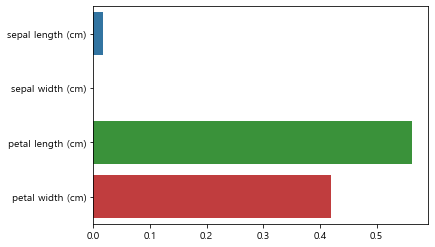

In [39]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

##### breast_cancer sample

In [28]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                   random_state=42)

In [29]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [30]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


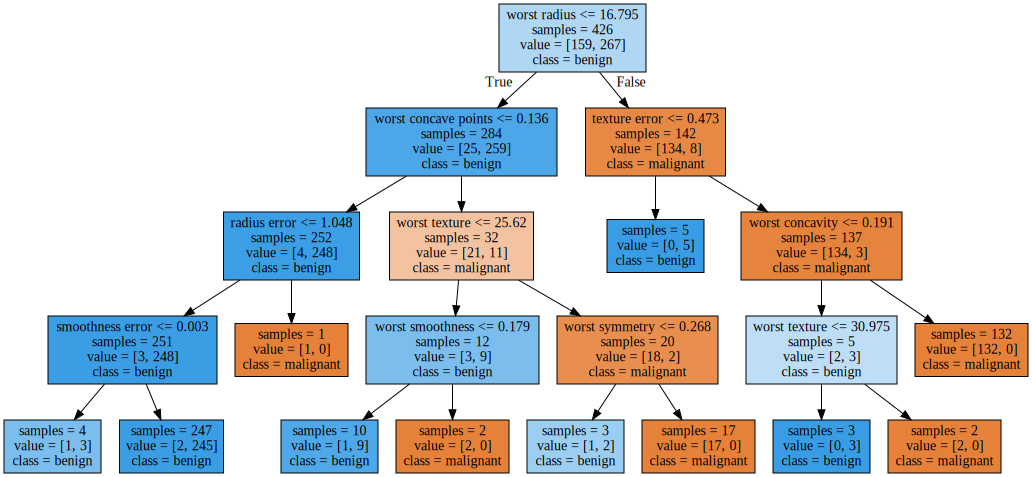

In [31]:
export_graphviz(tree, out_file="data/tree.dot", class_names=cancer.target_names,
               feature_names = cancer.feature_names, filled=True, impurity=False)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

In [34]:
# print(tree.feature_importances_)
# print(cancer.feature_names)
for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


<AxesSubplot:>

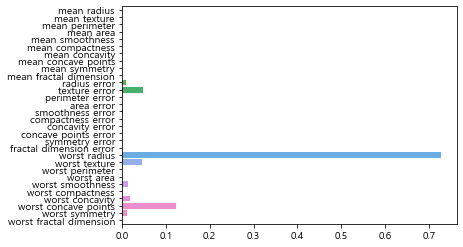

In [35]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

#### 2) 특성 중요도를 통해 추출한 특성만을 사용했을 때 성능 개선 효과

In [58]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [60]:
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train_std, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train_std, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test_std, y_test))

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


### (4) 사례1 : 서울 지역 동 분류

+ 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [61]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [62]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [63]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [64]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [65]:
##### 현재 가지고 있는 데이터에서 레이블의 갯수 확인
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangbuk     5
Gangdong    5
Gangseo     5
Gangnam     5
Name: label, dtype: int64
Gangbuk     5
Gangdong    5
Gangseo     5
Gangnam     5
Name: label, dtype: int64


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


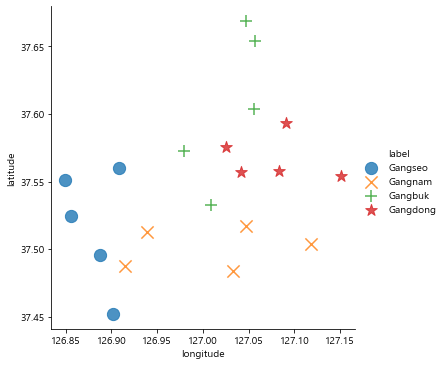

In [69]:
##### 데이터 시각화

sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False,
          markers=["o", "x", "+", "*"], hue="label", scatter_kws={"s":150})

In [70]:
##### 구 이름과 동 이름을 삭제

train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [72]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [89]:
X_train = train_df[["latitude", "longitude"]]
y_train = train_df["label"]

X_test = test_df[["latitude", "longitude"]]
y_test = test_df["label"]

In [90]:
##### Label값을 숫자로 변환

le = LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [91]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [92]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

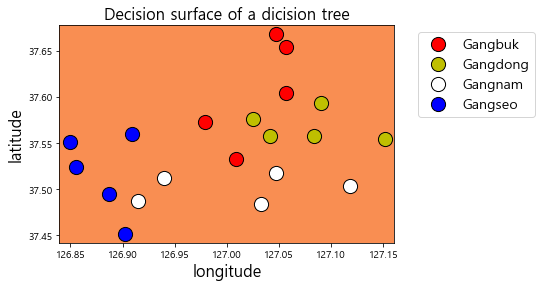

In [93]:
display_decision_surface(clf, X_train, y_encode)

In [94]:
pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


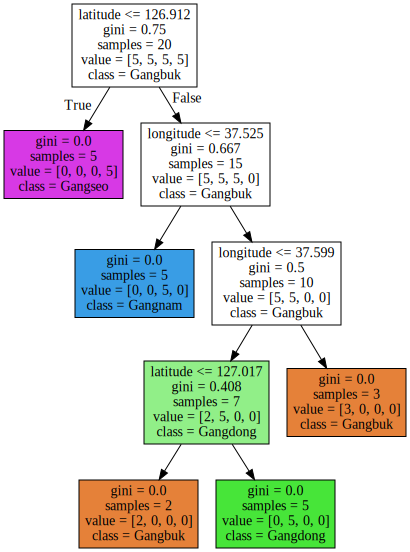

In [97]:
graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"],
               feature_names = ["longitude", "latitude"], filled=True, impurity=True)

graphviz.Source(graph)

# 2. RandomForest

#### 앙상블(Ensemble)
    - vote 방식
        - Soft Voting
        - Hard Voting
        
        
    - 종류
        - Voting
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
            
            
        - Bagging(Boosting Aggregating)
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            - RandomForest
            
            
        - Boosting(Adaptive Boosting, Gradient Boosting)
            - 여러 개의 분류기가 순차적으로 학습을 하되  앞에서 학습한 분류기가 틀린 데이터에서 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - XGBoost, Light GBM, Stacking, ...

In [101]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [106]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)

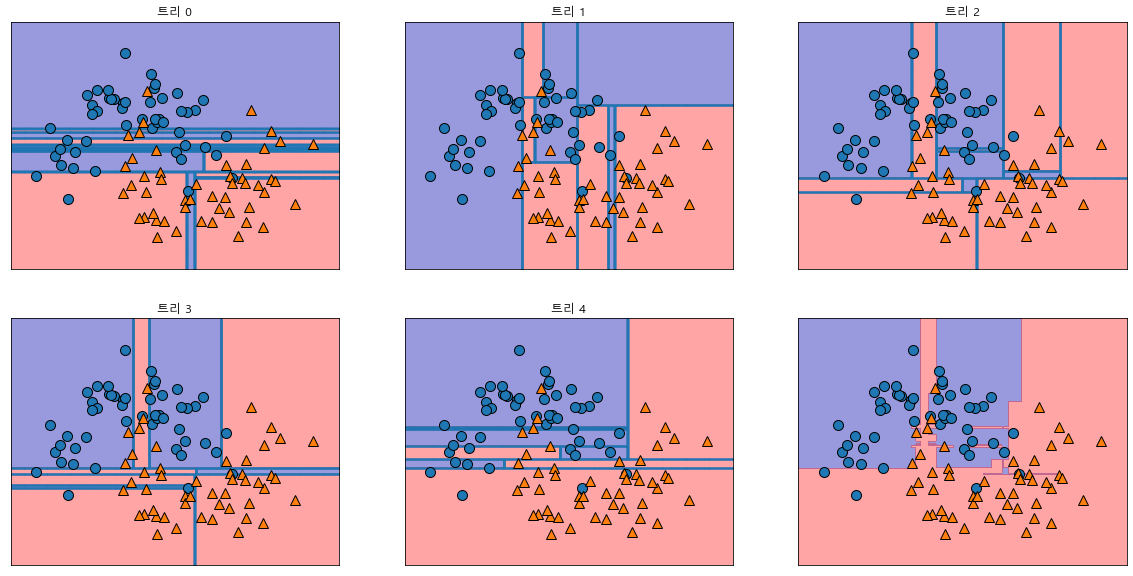

In [110]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### (1) DecisionTree vs. RandomForest

In [111]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [113]:
model1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.76


In [114]:
model1 = RandomForestClassifier(random_state=0, n_estimators=5).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9866666666666667
테스트 정확도 :  0.88


---

In [115]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [117]:
model1 = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.9370629370629371


<AxesSubplot:>

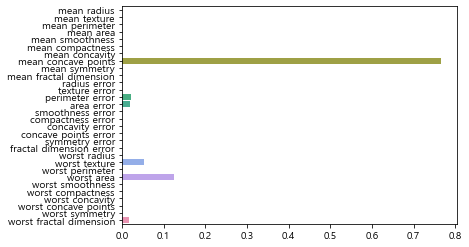

In [118]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [119]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


<AxesSubplot:>

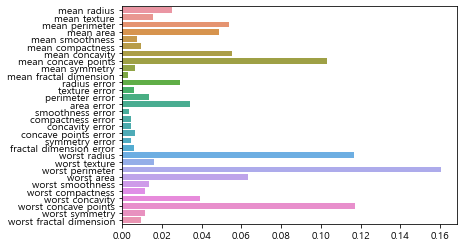

In [120]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

---

In [123]:
mnist = load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [124]:
X, y = mnist.data, mnist.target

In [127]:
##### 교차 검증을 위한 공용 함수

def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
        
    return cv_scores

In [128]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

In [132]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8249065797641215
0.9504652389819988


<AxesSubplot:>

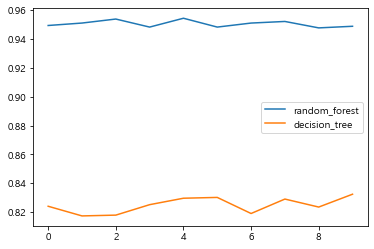

In [135]:
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df
df.plot()

### (2) 사례1 : 독버섯 데이터

+ https://archive.ics.uci.edu/ml/datasets/mushroom
    - agaricus-lepiota.data
    
    
+ 파일명을 "mushrooms.csv"로 변경

In [136]:
import urllib.request as req

savedir = "data/mushrooms1.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료


In [5]:
mr = pd.read_csv("data/mushrooms.csv", header=None)
print(mr.shape)
mr.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
##### 결측치 여부

mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [7]:
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
##### feature와 label을 분리

X = mr.drop(0, axis=1)
y = mr[0]

In [10]:
X.head()
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: 0, Length: 8124, dtype: object

In [11]:
##### feature들의 숫자화

enc_x = LabelEncoder()

for col in X.columns:
    X[col] = enc_x.fit_transform(X[col])
    
enc_y = LabelEncoder()
y = enc_y.fit_transform(y)

In [13]:
X.head()
y

array([1, 0, 0, ..., 0, 1, 0])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
##### RandomForest

random_clf = RandomForestClassifier().fit(X_train, y_train)
pred = random_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1032
           1       1.00      1.00      1.00       999

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [19]:
##### DecisionTree

decision_clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = decision_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1032
           1       1.00      1.00      1.00       999

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
##### KNN

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1032
           1       1.00      1.00      1.00       999

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [27]:
##### LogisticRegression

logistic_clf = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
pred = logistic_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1032
           1       0.97      0.96      0.96       999

    accuracy                           0.97      2031
   macro avg       0.97      0.96      0.97      2031
weighted avg       0.97      0.97      0.97      2031



### (3) 사례2 : 사용자 행동 인식 데이터셋

+ https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones
    - UCI HAR Dataset.zip 다운로드

In [31]:
feature_name_df = pd.read_csv("data/human_activity/features.txt", sep="\s+", header=None,
                             names=["column_index", "column_name"])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [32]:
##### 인덱스를 없애고 피처명만 리스트로 생성

feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [36]:
feature_dup_df = feature_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df["column_index"] > 1].count())
feature_dup_df[feature_dup_df["column_index"] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [37]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [39]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df["dup_cnt"] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [40]:
def get_human_dataset():
    feature_name_df = pd.read_csv("data/human_activity/features.txt", sep="\s+", header=None,
                             names=["column_index", "column_name"])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv("data/human_activity/train/X_train.txt", sep="\s+", names=feature_name)
    X_test = pd.read_csv("data/human_activity/test/X_test.txt", sep="\s+", names=feature_name)
    
    y_train = pd.read_csv("data/human_activity/train/y_train.txt", sep="\s+",
                         header=None, names=["action"])
    y_test = pd.read_csv("data/human_activity/test/y_test.txt", sep="\s+",
                         header=None, names=["action"])
    
    return X_train, X_test, y_train, y_test

In [41]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [43]:
##### 카테고리 분포 확인

y_train["action"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [46]:
##### 결측치 확인

X_train.isnull().sum().sum()

0

#### 1) DecisionTree

In [51]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("정확도 : ", accuracy)

정확도 :  0.8547675602307431


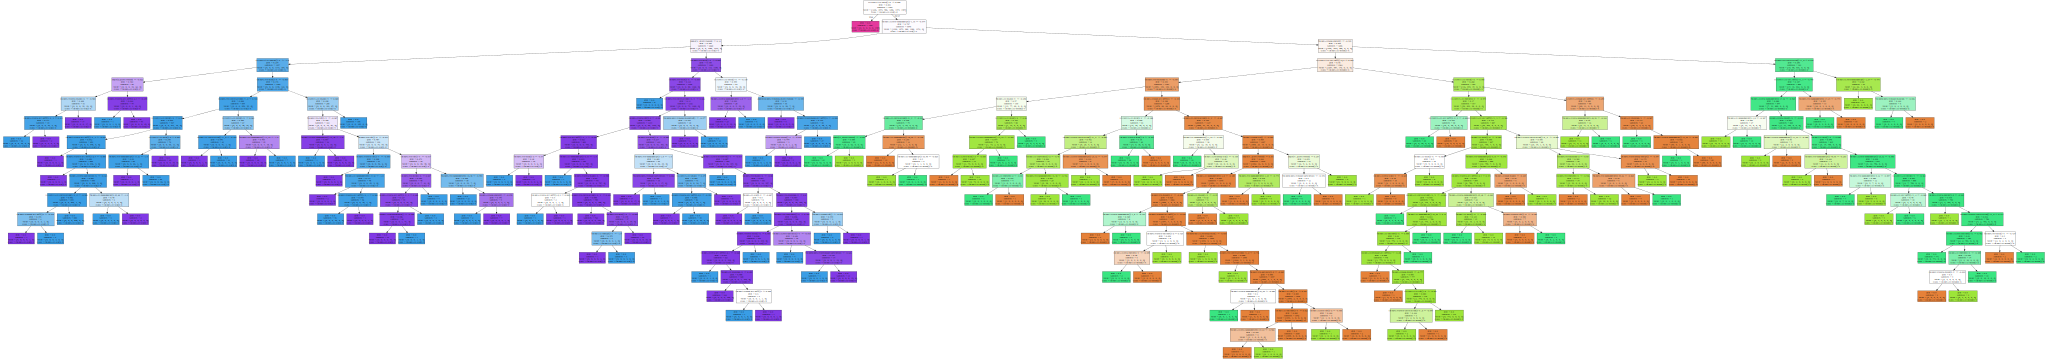

In [49]:
graph = export_graphviz(dt_clf, out_file=None, class_names=feature_name,
               feature_names = feature_name, filled=True, impurity=True)

graphviz.Source(graph)

In [50]:
##### 파라미터 확인

dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

In [52]:
##### GridSearchCV를 이용해서 max_depth 최상의 값 선택

params = {"max_depth":[6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("최고 평균 정확도 수치 : ", grid_cv.best_score_)
print("최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.1min finished


최고 평균 정확도 수치 :  0.8513444970102249
최적 하이퍼 파라미터 :  {'max_depth': 16}


In [54]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[["param_max_depth", "mean_test_score"]]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [56]:
##### 실제 테스트 데이터를 가지고 훈련과 결과 측정

max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    
    pred = dt_clf.predict(X_test)
    print("{}깊이 정확도 {}".format(depth, accuracy_score(y_test, pred))) 

6깊이 정확도 0.8557855446216491
8깊이 정확도 0.8707159823549372
10깊이 정확도 0.8673227010519172
12깊이 정확도 0.8646080760095012
16깊이 정확도 0.8574821852731591
20깊이 정확도 0.8547675602307431
24깊이 정확도 0.8547675602307431


In [58]:
params = {"max_depth":[6, 8, 10, 12, 16, 20, 24], "min_samples_split":[16, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("최고 평균 정확도 수치 : ", grid_cv.best_score_)
print("최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  2.3min finished


최고 평균 정확도 수치 :  0.8548794147162603
최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [59]:
pred = grid_cv.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.8717339667458432


<AxesSubplot:>

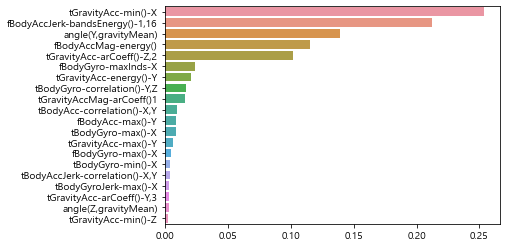

In [65]:
##### 특성 중요도 확인

best_clf = grid_cv.best_estimator_
important_values = best_clf.feature_importances_

important_series = pd.Series(important_values, index=X_train.columns) 
top20 = important_series.sort_values(ascending=False)[:20]
top20

sns.barplot(x=top20, y=top20.index)

---

#### 2) RandomForest

In [66]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [67]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

<ipython-input-67-716bb91c27c2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


정확도 :  0.9253478113335596


In [69]:
params = {"n_estimators":[100, 150], 
          "max_depth":[6, 8, 10, 12],
         "min_samples_leaf":[8, 12, 18],
         "min_samples_split":[8, 16, 20]}

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("최고 평균 정확도 수치 : ", grid_cv.best_score_)
print("최적 하이퍼 파라미터 : ", grid_cv.best_params_)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최고 평균 정확도 수치 :  0.91879760609358
최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 150}


<AxesSubplot:>

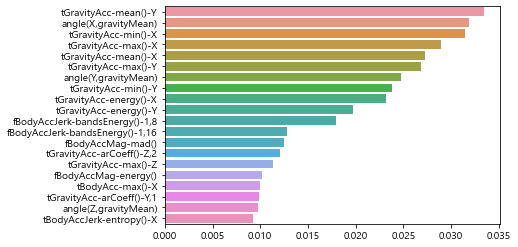

In [70]:
best_clf = grid_cv.best_estimator_
important_values = best_clf.feature_importances_

important_series = pd.Series(important_values, index=X_train.columns) 
top20 = important_series.sort_values(ascending=False)[:20]
top20

sns.barplot(x=top20, y=top20.index)

In [71]:
##### KNN

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print(classification_report(y_test, pred))

<ipython-input-71-90077f2a50fb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_clf = KNeighborsClassifier().fit(X_train, y_train)


              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.89      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.79      0.85       491
           5       0.83      0.93      0.88       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



In [72]:
##### LogisticRegression

logistic_clf = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
pred = logistic_clf.predict(X_test)
print(classification_report(y_test, pred))

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.98      0.95      0.96       471
           3       0.99      0.97      0.98       420
           4       0.96      0.89      0.92       491
           5       0.91      0.97      0.94       532
           6       0.99      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



# 3. Gradient Boosting Model

+ 분류와 회귀에서 모두 사용 가능
+ 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사하강법(Gradient Descent Algorithm))
+ 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공
+ learning_rate 파라미터를 사용하여 오차 보정
+ XG Boost, LightGBM, ...

In [74]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [75]:
?GradientBoostingClassifier

In [76]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [79]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [84]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958


훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


<AxesSubplot:>

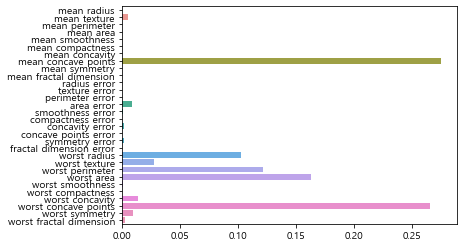

In [85]:
##### 특성 중요도

tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

---

In [86]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [87]:
##### RandomForest 기본값 확인

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.predict(X_test)

print("훈련 정확도 : ", clf.score(X_train, y_train))
print("테스트 정확도 : ", clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.936


In [88]:
params = {
    "n_estimators":[100, 200, 300],
    "max_depth":[2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf":[1, 2, 3, 4, 5],
    "min_samples_split":[4, 8, 10, 11, 12, 13, 14]
}

clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(clf2, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [89]:
print("최적의 파라미터 : ", grid_cv.best_params_)
print("최고 예측 정확도 : ", grid_cv.best_score_)

최적의 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도 :  0.9453333333333334


In [90]:
##### GradientBoostingModel 기본값 확인

clf3 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

clf3.predict(X_test)

print("훈련 정확도 : ", clf3.score(X_train, y_train))
print("테스트 정확도 : ", clf3.score(X_test, y_test))

훈련 정확도 :  0.988
테스트 정확도 :  0.932


In [95]:
params = {
    "n_estimators":[100, 200, 300],
    "max_depth":[2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf":[1, 2, 3, 4, 5],
    "min_samples_split":[4, 8, 10, 11, 12, 13, 14],
    "learning_rate":[0.1, 0.01, 0.001, 1]
}

clf4 = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(clf4, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 8, 10, 11, 12, 13, 14],
                         'n_estimators': [100, 200, 300]})

In [97]:
print("훈련 정확도 : ", grid_cv.score(X_train, y_train))
print("테스트 정확도 : ", grid_cv.score(X_test, y_test))

훈련 정확도 :  0.972
테스트 정확도 :  0.932


### XGBoost

+ 트리 기반의 앙상블 기법
+ 분류에 있어서는 다른 알고리즘보다 좋은 예측 성능을 보여줌.
+ XGBoost는 GBM기반이지만, GBM의 단점인 느린 수행과 과적합 규제 부재 등의 문제를 해결
+ 병렬 CPU환경에서 빠르게 학습 가능

#### 1) xgboost

In [104]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=.2, random_state=123)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [105]:
params = {
    "max_depth":3,
    "eta":0.1,
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "early_stopping":100
}

num_rounds = 400

evals = [(dtrain, "train"), (dtest, "eval")]

In [106]:
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, 
                      early_stopping_rounds=100, evals=evals)

[16:08:30] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stopping } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32222	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]

In [108]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [110]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])
print(y_test[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[1 1 0 1 0 1 1 0 1 1]


In [111]:
from sklearn.metrics import precision_score, recall_score

print("정확도 : ", accuracy_score(y_test, preds))
print("정밀도 : ", precision_score(y_test, preds))
print("재현율 : ", recall_score(y_test, preds))

정확도 :  0.9736842105263158
정밀도 :  0.972972972972973
재현율 :  0.9863013698630136


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

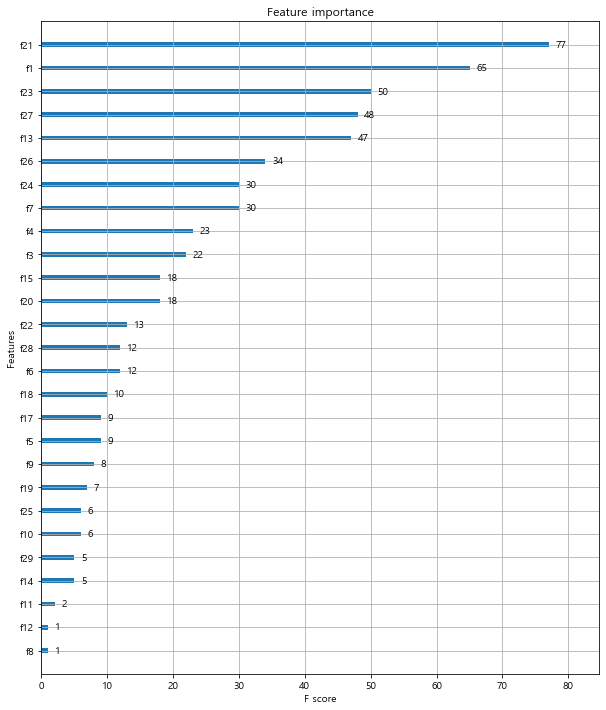

In [112]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

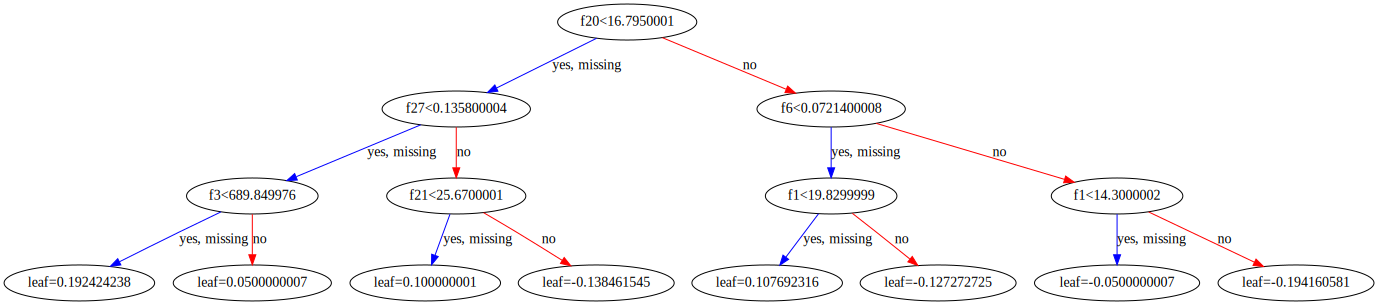

In [113]:
graphviz.Source(xgb.to_graphviz(xgb_model))

#### 2) XGBClassifier

+ 붓꽃 데이터 샘플

In [4]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, 
                                                    random_state=123)

In [9]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

# preds = xgbc.predict(X_test)
# pred_proba = xgbc.predict_proba(X_test)
print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 : ", xgbc.score(X_test, y_test))

[09:53:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 :  0.9666666666666667


In [12]:
cross_val = cross_validate(estimator=xgbc, X=iris.data, y=iris.target, cv=5)
cross_val

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

C:\Users\acorn\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

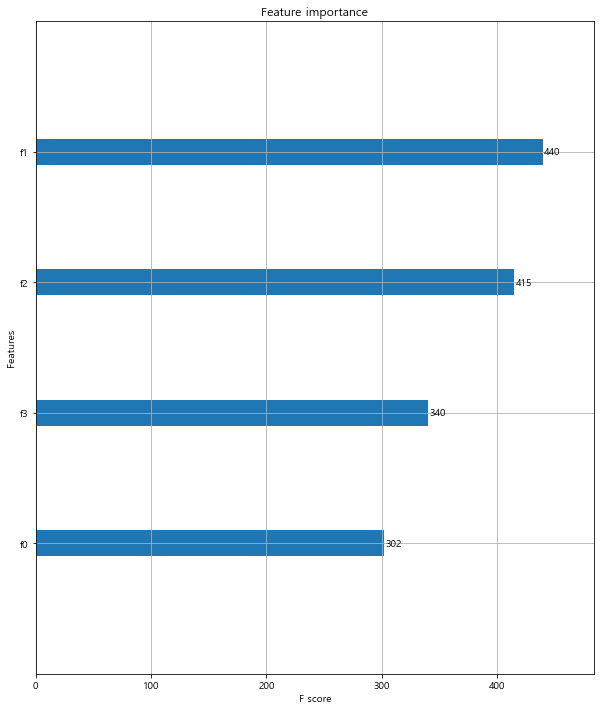

In [13]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

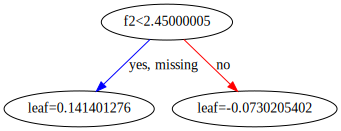

In [15]:
graphviz.Source(xgb.to_graphviz(xgbc))

+ Wine 데이터 샘플

In [20]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.2, 
                                                    random_state=123)

In [21]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 : ", xgbc.score(X_test, y_test))

[10:35:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 :  1.0


In [22]:
cross_val = cross_validate(estimator=xgbc, X=wine.data, y=wine.target, cv=5)
cross_val

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

C:\Users\acorn\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

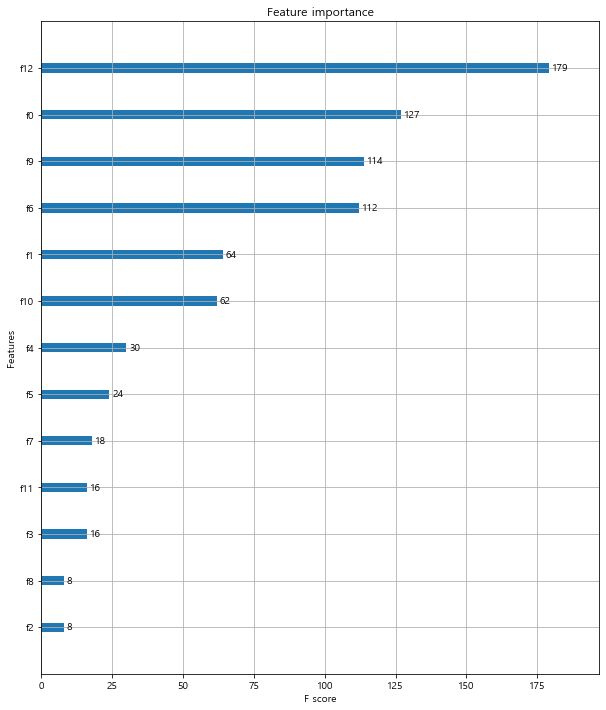

In [23]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

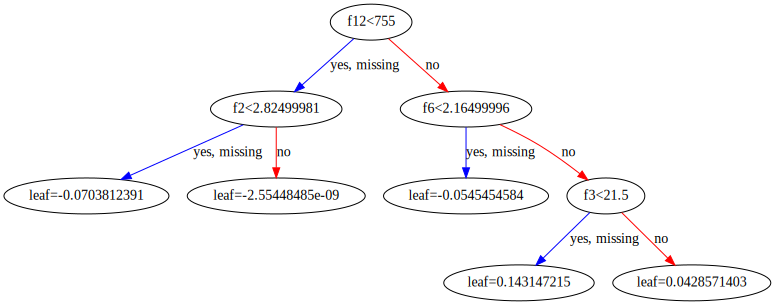

In [24]:
graphviz.Source(xgb.to_graphviz(xgbc))

+ 유방암 데이터 샘플

In [25]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2, 
                                                    random_state=123)

In [26]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)

print("훈련 정확도 : ", xgbc.score(X_train, y_train))
print("테스트 정확도 : ", xgbc.score(X_test, y_test))

[10:40:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 정확도 :  1.0
테스트 정확도 :  0.9736842105263158


C:\Users\acorn\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [27]:
cross_val = cross_validate(estimator=xgbc, X=cancer.data, y=cancer.target, cv=5)
cross_val

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

C:\Users\acorn\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

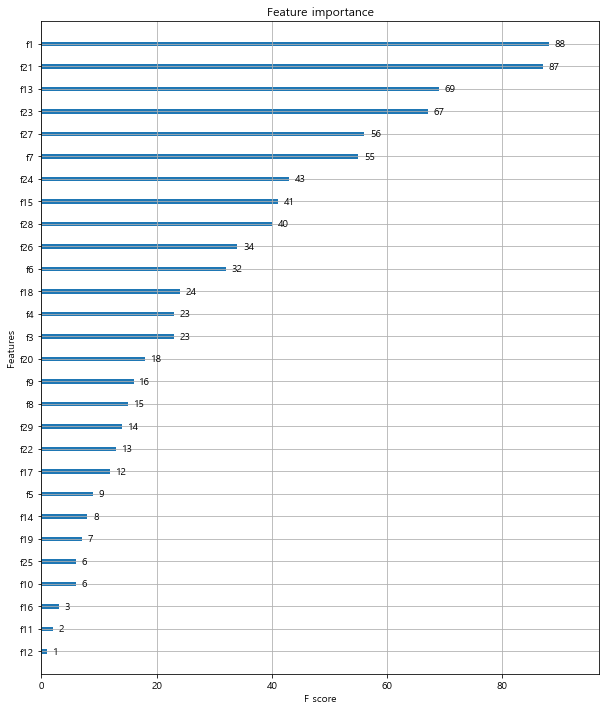

In [28]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)

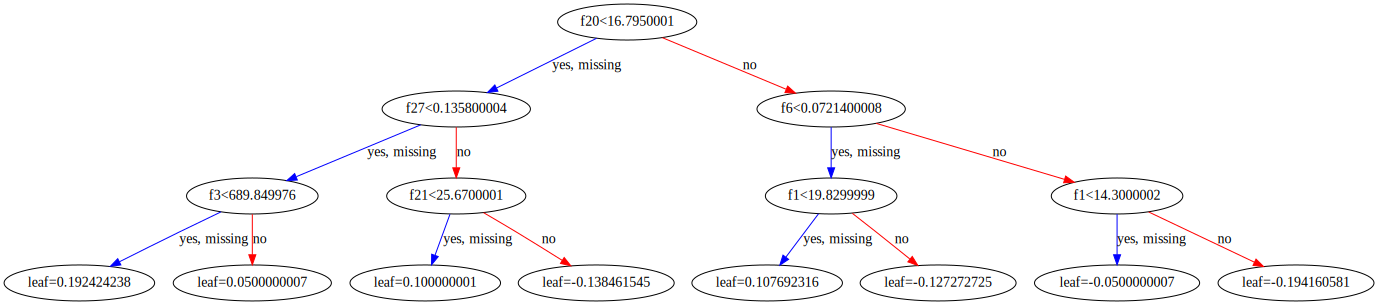

In [29]:
graphviz.Source(xgb.to_graphviz(xgbc))

#### 2) XGBRegressor

+ Boston Housing Sample

In [30]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2, 
                                                    random_state=123)

In [32]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

print("훈련 정확도 : ", xgbr.score(X_train, y_train))
print("테스트 정확도 : ", xgbr.score(X_test, y_test))

훈련 정확도 :  0.9972630325759281
테스트 정확도 :  0.8151645284726049


In [33]:
cross_val = cross_validate(estimator=xgbr, X=boston.data, y=boston.target, cv=5)
cross_val

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.09913625717163085 (+/- 0.005409301538808166)
avg score time:0.0007960319519042969 (+/- 0.00039803372770039224)
avg test score:0.6884390736705599 (+/- 0.1649974770303876)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

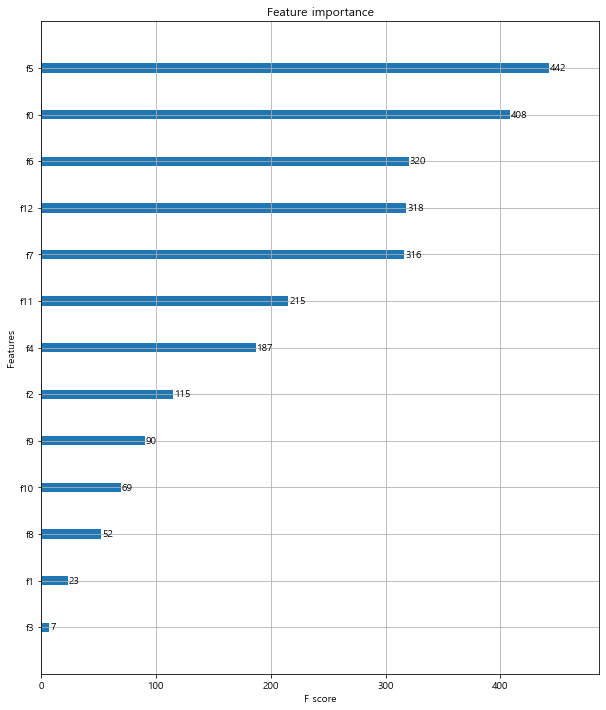

In [36]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax)

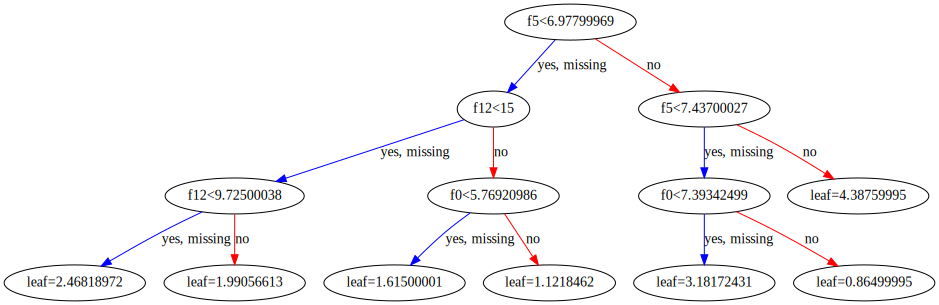

In [37]:
graphviz.Source(xgb.to_graphviz(xgbr))

+ 당뇨병 데이터

In [38]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=.2, 
                                                    random_state=123)

In [39]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)

print("훈련 정확도 : ", xgbr.score(X_train, y_train))
print("테스트 정확도 : ", xgbr.score(X_test, y_test))

훈련 정확도 :  0.9679523032821651
테스트 정확도 :  0.45470848778208584


In [41]:
cross_val = cross_validate(estimator=xgbr, X=diabetes.data, y=diabetes.target, cv=5)
cross_val

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.10083193778991699 (+/- 0.007675538782997179)
avg score time:0.0019946575164794924 (+/- 0.001994586032941574)
avg test score:0.30005291115066424 (+/- 0.07589309667544569)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

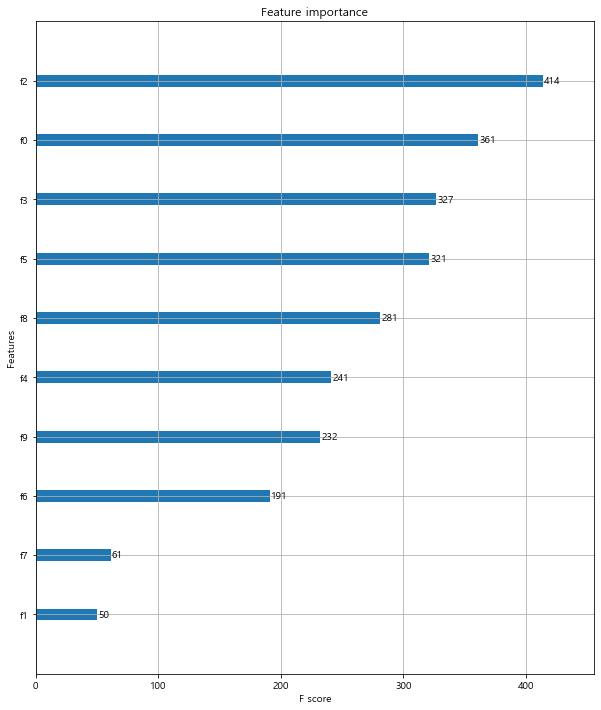

In [42]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax)

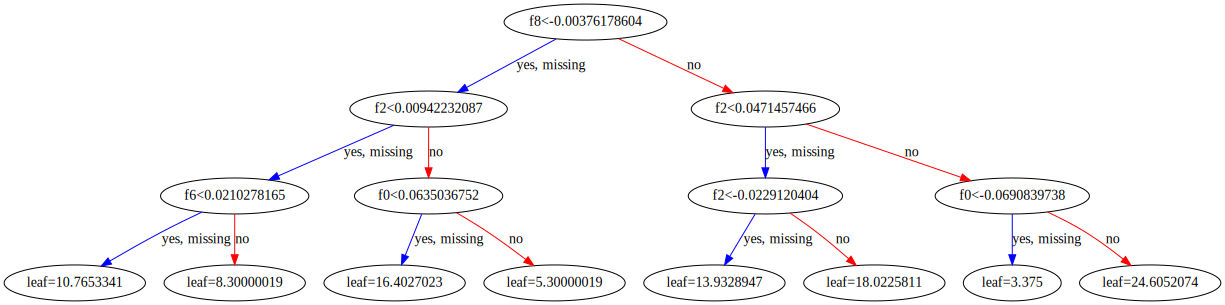

In [43]:
graphviz.Source(xgb.to_graphviz(xgbr))

### LightGBM

+ 빠른 학습과 예측 시간
+ 더 적은 메모리 사용
+ 범주형 특징의 자동 변환과 최적 분할

#### 1) LGBMClassifier

+ 붓꽃 데이터

In [47]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, 
                                                    random_state=123)

In [48]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, 
          verbose=True)

[1]	valid_0's multi_logloss: 0.95847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0

LGBMClassifier(n_estimators=400)

In [49]:
cross_val = cross_validate(estimator=lgbmc, X=iris.data, y=iris.target, cv=5)

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.05604996681213379 (+/- 0.011148952705220996)
avg score time:0.000598287582397461 (+/- 0.0004884997731965917)
avg test score:0.9600000000000002 (+/- 0.04898979485566355)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

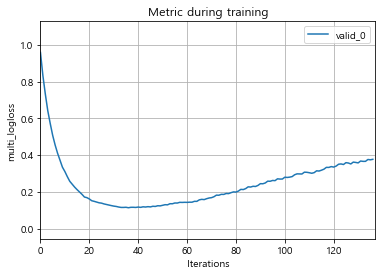

In [50]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

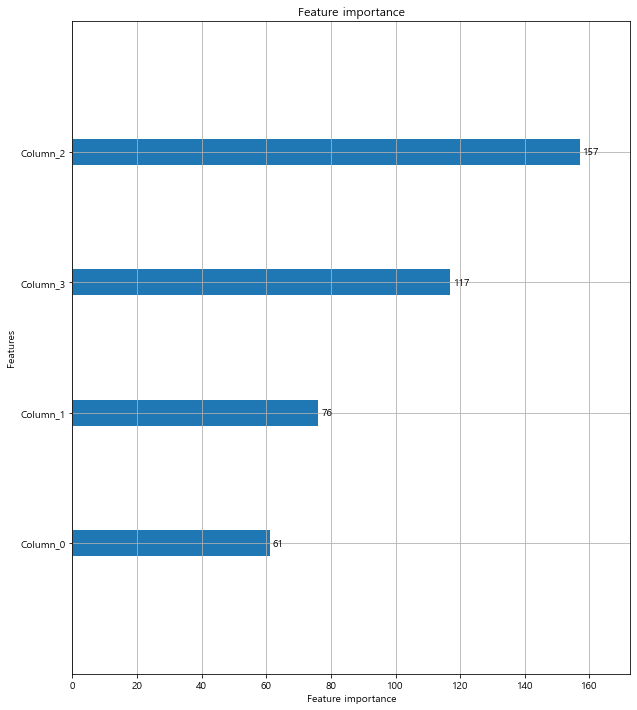

In [51]:
plot_importance(lgbmc, figsize=(10, 12))

<AxesSubplot:>

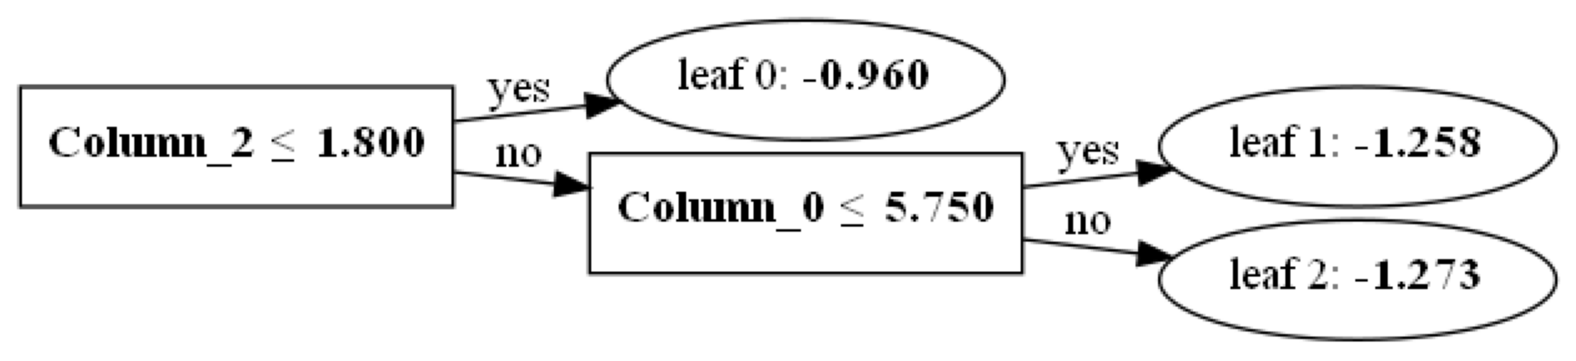

In [53]:
plot_tree(lgbmc, figsize=(28, 24))

+ Wine Data

In [54]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.2, 
                                                    random_state=123)

In [55]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, 
          verbose=True)

[1]	valid_0's multi_logloss: 1.05985
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.941671
[3]	valid_0's multi_logloss: 0.838354
[4]	valid_0's multi_logloss: 0.761596
[5]	valid_0's multi_logloss: 0.677439
[6]	valid_0's multi_logloss: 0.607711
[7]	valid_0's multi_logloss: 0.556301
[8]	valid_0's multi_logloss: 0.51301
[9]	valid_0's multi_logloss: 0.460772
[10]	valid_0's multi_logloss: 0.418941
[11]	valid_0's multi_logloss: 0.386691
[12]	valid_0's multi_logloss: 0.354477
[13]	valid_0's multi_logloss: 0.325968
[14]	valid_0's multi_logloss: 0.302653
[15]	valid_0's multi_logloss: 0.279562
[16]	valid_0's multi_logloss: 0.258911
[17]	valid_0's multi_logloss: 0.239598
[18]	valid_0's multi_logloss: 0.220811
[19]	valid_0's multi_logloss: 0.203974
[20]	valid_0's multi_logloss: 0.188324
[21]	valid_0's multi_logloss: 0.175522
[22]	valid_0's multi_logloss: 0.162242
[23]	valid_0's multi_logloss: 0.151123
[24]	valid_0's multi_logloss: 0.140635
[25]	valid_0'

LGBMClassifier(n_estimators=400)

In [56]:
cross_val = cross_validate(estimator=lgbmc, X=wine.data, y=wine.target, cv=5)

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.04937124252319336 (+/- 0.004277418841008274)
avg score time:0.0007956981658935547 (+/- 0.0003978671814585366)
avg test score:0.9776190476190475 (+/- 0.01119469694127331)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

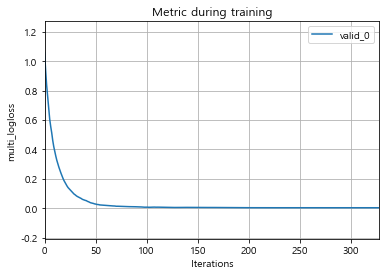

In [57]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

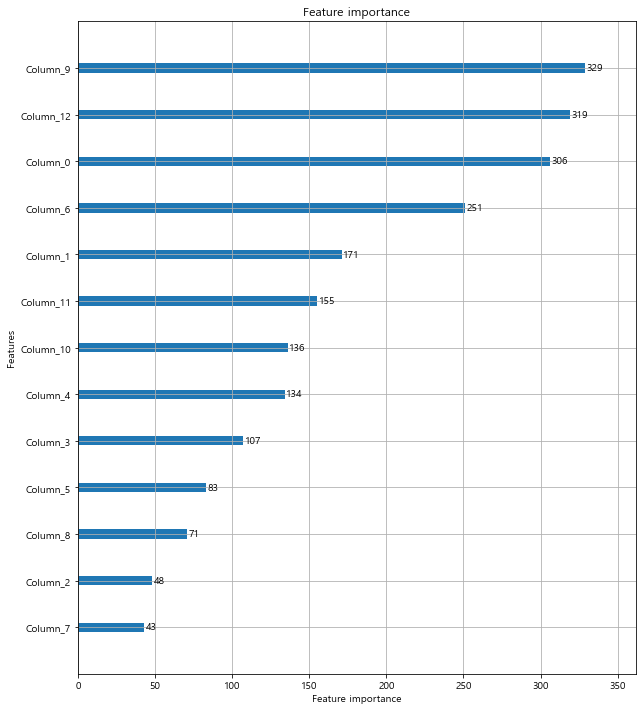

In [58]:
plot_importance(lgbmc, figsize=(10, 12))

<AxesSubplot:>

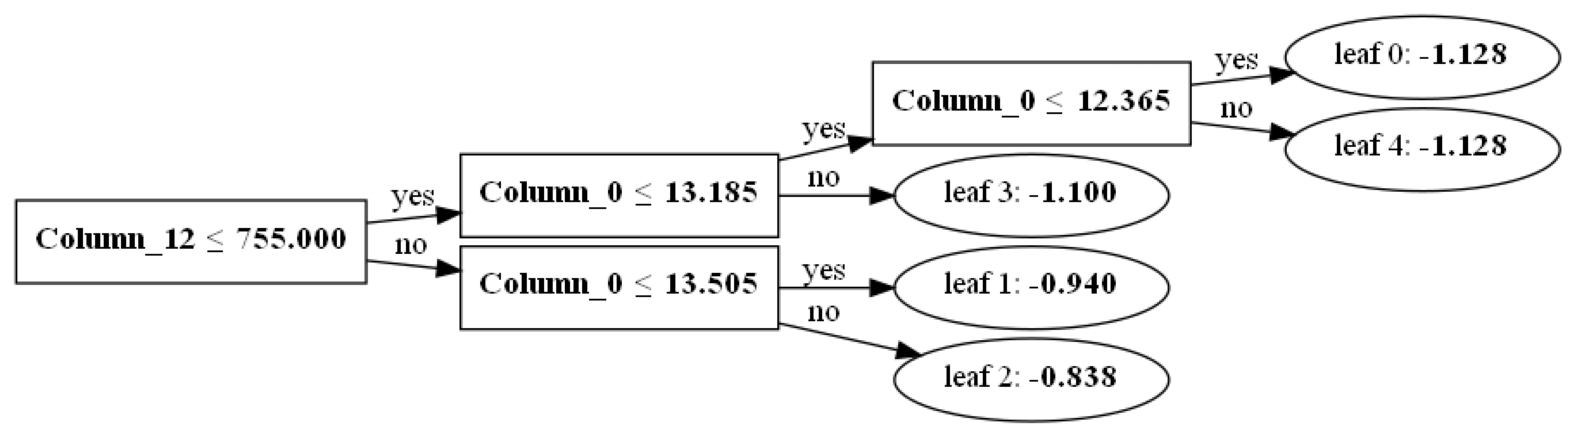

In [59]:
plot_tree(lgbmc, figsize=(28, 24))

+ 유방암 데이터셋

In [60]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2, 
                                                    random_state=123)

In [61]:
lgbmc = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, 
          verbose=True)

[1]	valid_0's binary_logloss: 0.575665
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383433
[6]	valid_0's binary_logloss: 0.351962
[7]	valid_0's binary_logloss: 0.325134
[8]	valid_0's binary_logloss: 0.301618
[9]	valid_0's binary_logloss: 0.276072
[10]	valid_0's binary_logloss: 0.259487
[11]	valid_0's binary_logloss: 0.244766
[12]	valid_0's binary_logloss: 0.224551
[13]	valid_0's binary_logloss: 0.211222
[14]	valid_0's binary_logloss: 0.197052
[15]	valid_0's binary_logloss: 0.187863
[16]	valid_0's binary_logloss: 0.180071
[17]	valid_0's binary_logloss: 0.172646
[18]	valid_0's binary_logloss: 0.162952
[19]	valid_0's binary_logloss: 0.154079
[20]	valid_0's binary_logloss: 0.146169
[21]	valid_0's binary_logloss: 0.140076
[22]	valid_0's binary_logloss: 0.132763
[23]	valid_0's binary_logloss: 0.127181
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=400)

In [62]:
cross_val = cross_validate(estimator=lgbmc, X=cancer.data, y=cancer.target, cv=5)

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.06511363983154297 (+/- 0.011538954430762268)
avg score time:0.0007984638214111328 (+/- 0.0003992328895802883)
avg test score:0.9736531594472908 (+/- 0.015674460437800138)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

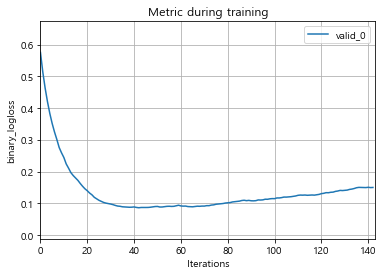

In [63]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

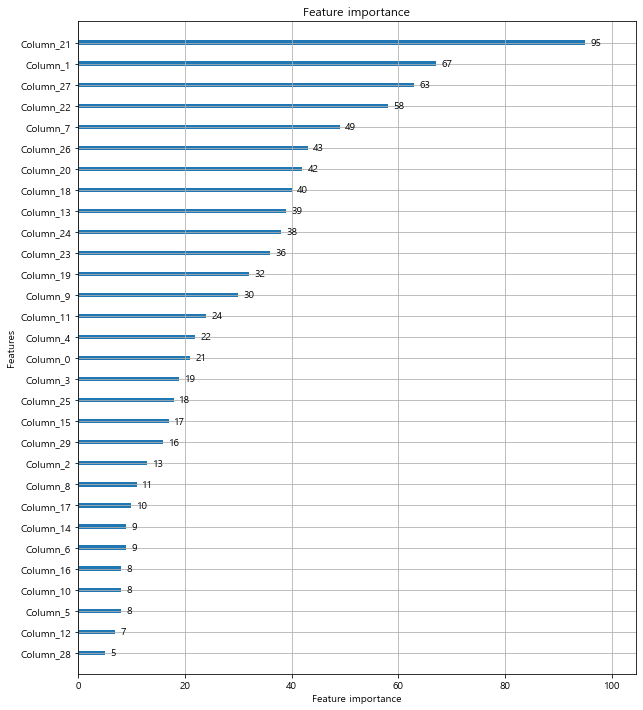

In [64]:
plot_importance(lgbmc, figsize=(10, 12))

<AxesSubplot:>

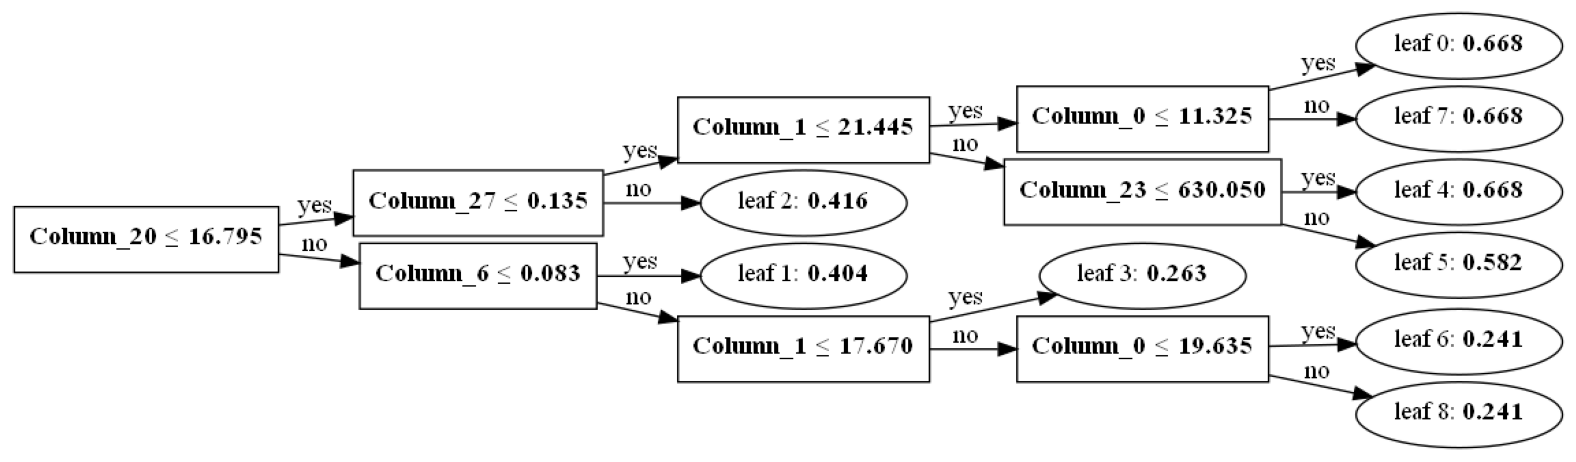

In [65]:
plot_tree(lgbmc, figsize=(28, 24))

#### 2) LGBMRegressor

+ 보스톤 샘플

In [66]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2, 
                                                    random_state=123)

In [67]:
lgbmr = LGBMRegressor(n_estimators=400)

evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, 
          verbose=True)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	val

LGBMRegressor(n_estimators=400)

In [68]:
cross_val = cross_validate(estimator=lgbmr, X=boston.data, y=boston.target, cv=5)

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.07769284248352051 (+/- 0.012856726576212245)
avg score time:0.0009974002838134765 (+/- 1.1680077279964343e-07)
avg test score:0.5692468252571979 (+/- 0.2956636613238221)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

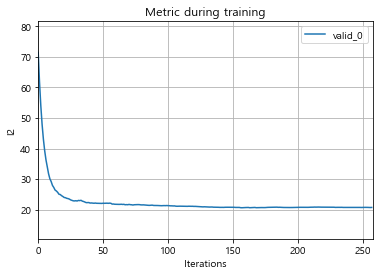

In [69]:
plot_metric(lgbmr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

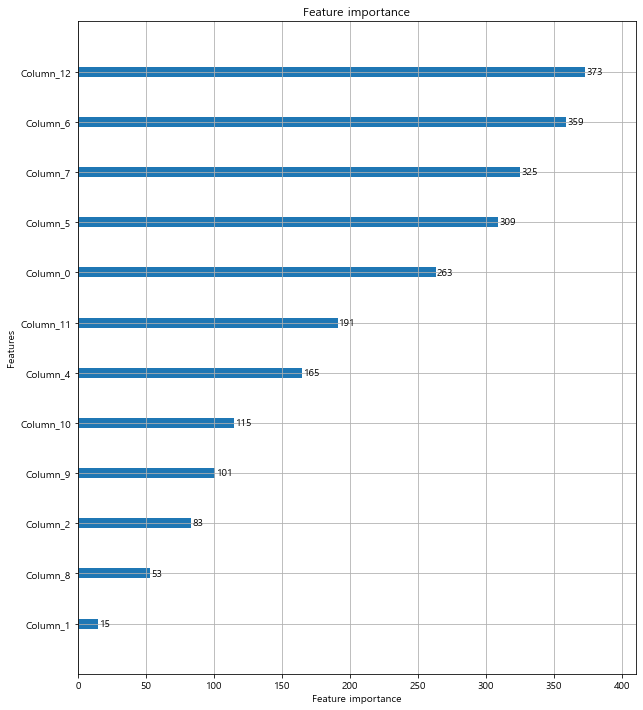

In [70]:
plot_importance(lgbmr, figsize=(10, 12))

<AxesSubplot:>

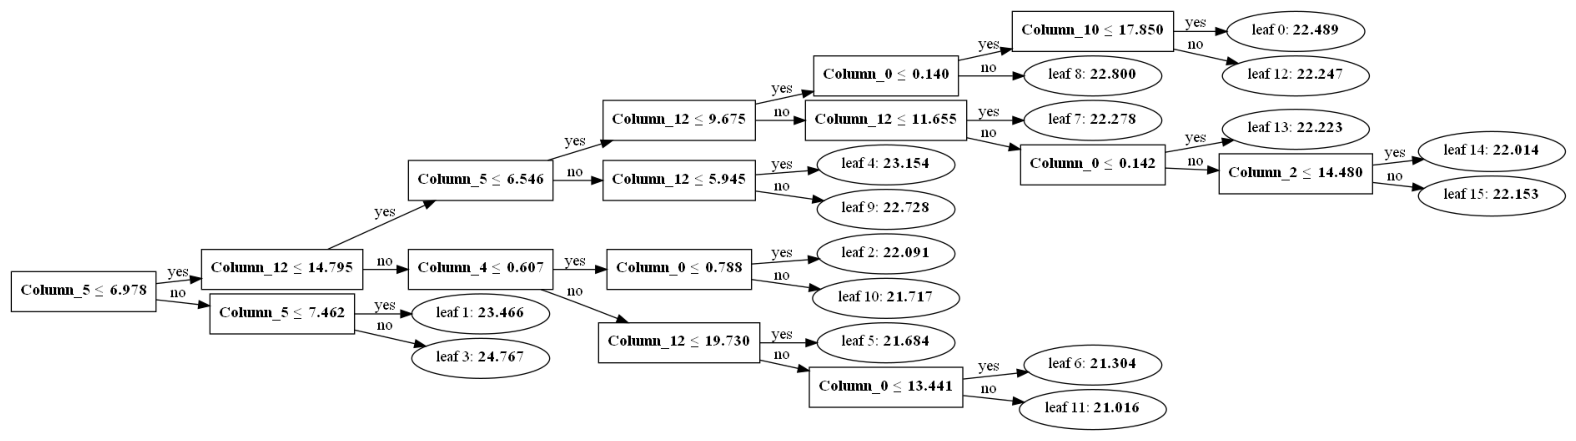

In [71]:
plot_tree(lgbmr, figsize=(28, 24))

+ 당뇨병 샘플

In [72]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=.2, 
                                                    random_state=123)

In [73]:
lgbmr = LGBMRegressor(n_estimators=400)

evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, 
          verbose=True)

[1]	valid_0's l2: 5692.17
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36]

LGBMRegressor(n_estimators=400)

In [74]:
cross_val = cross_validate(estimator=lgbmr, X=diabetes.data, y=diabetes.target, cv=5)

print("avg fit time:{} (+/- {})".format(cross_val["fit_time"].mean(), cross_val["fit_time"].std()))
print("avg score time:{} (+/- {})".format(cross_val["score_time"].mean(), cross_val["score_time"].std()))
print("avg test score:{} (+/- {})".format(cross_val["test_score"].mean(), cross_val["test_score"].std()))

avg fit time:0.06113753318786621 (+/- 0.009195068326685658)
avg score time:0.000797891616821289 (+/- 0.00039894584759375934)
avg test score:0.30867643947179507 (+/- 0.07010708786960605)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

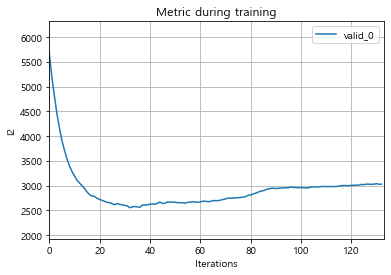

In [75]:
plot_metric(lgbmr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

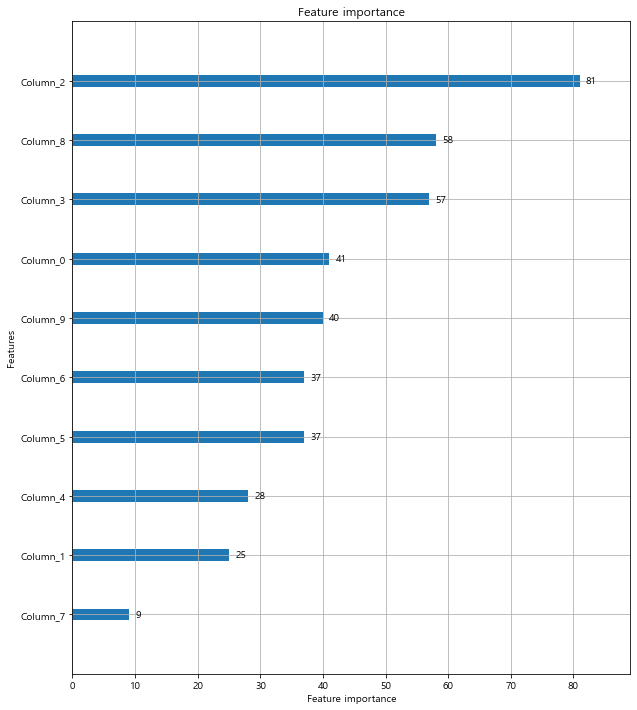

In [76]:
plot_importance(lgbmr, figsize=(10, 12))

<AxesSubplot:>

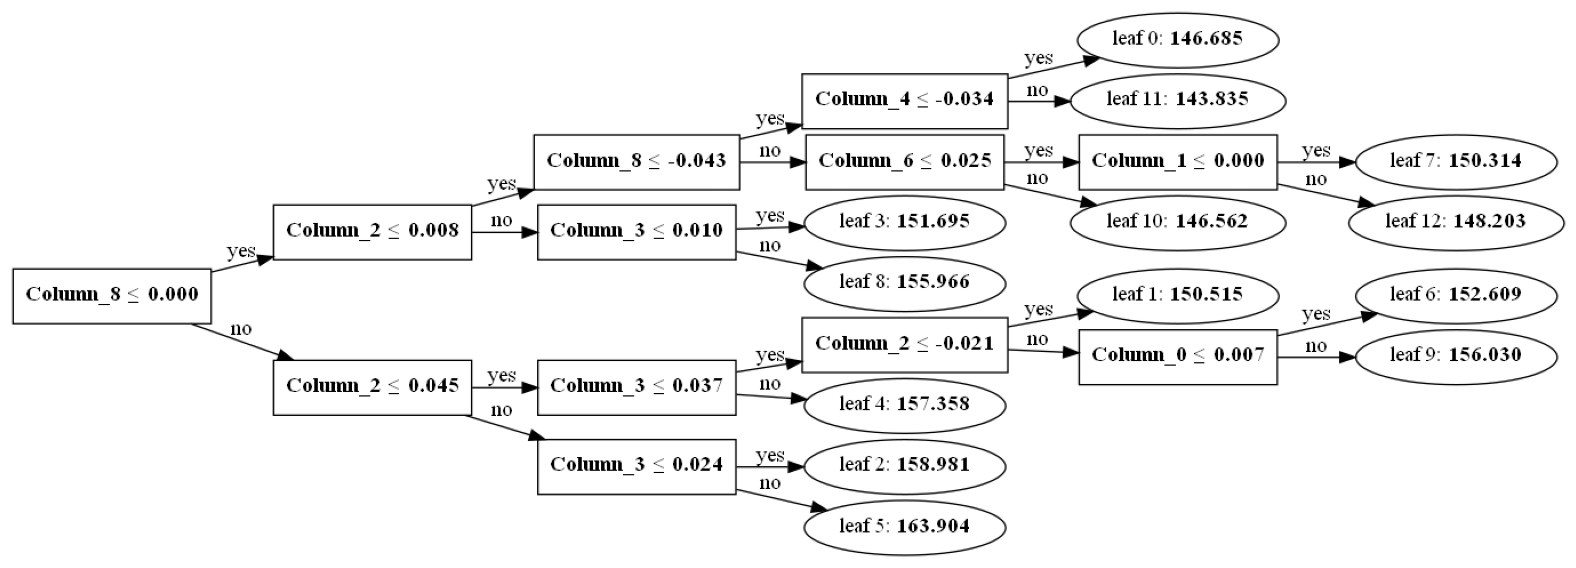

In [77]:
plot_tree(lgbmr, figsize=(28, 24))

# 4. Voting Classifier

In [79]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.2, 
                                                    random_state=123)

In [80]:
lr_clf = LogisticRegression(max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [81]:
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [82]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [83]:
preds = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : ", accuracy_score(y_test, preds))

Voting 분류기 정확도 :  0.9736842105263158


In [84]:
classifiers = [lr_clf, knn_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    
    class_name = clf.__class__.__name__
    print("{} 정확도 : {}".format(class_name, accuracy_score(y_test, preds)))

LogisticRegression 정확도 : 0.9824561403508771
KNeighborsClassifier 정확도 : 0.9649122807017544
